In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

C:\Users\hrishikesh\anaconda3\envs\gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [12]:
!cd labelimg && pyrcc5 -o libs/resources.py resources.qrc

In [2]:
!cd labelimg && python labelimg.py

Image:C:\Users\hrishikesh\Desktop\brain-tumor\yes\train\Y1.jpg -> Annotation:C:/Users/hrishikesh/Desktop/brain-tumor/yes/train/Y1.txt
Image:C:\Users\hrishikesh\Desktop\brain-tumor\yes\train\Y3.jpg -> Annotation:C:/Users/hrishikesh/Desktop/brain-tumor/yes/train/Y3.txt
[('tumor', [(120, 119), (211, 119), (211, 203), (120, 203)], None, None, False)]
[('tumor', [(23, 75), (89, 75), (89, 140), (23, 140)], None, None, False)]
[('tumor', [(120, 119), (211, 119), (211, 203), (120, 203)], None, None, False)]
Image:C:\Users\hrishikesh\Desktop\brain-tumor\yes\train\Y4.jpg -> Annotation:C:/Users/hrishikesh/Desktop/brain-tumor/yes/train/Y4.txt
Image:C:\Users\hrishikesh\Desktop\brain-tumor\yes\train\Y6.jpg -> Annotation:C:/Users/hrishikesh/Desktop/brain-tumor/yes/train/Y6.txt
Image:C:\Users\hrishikesh\Desktop\brain-tumor\yes\train\Y7.jpg -> Annotation:C:/Users/hrishikesh/Desktop/brain-tumor/yes/train/Y7.txt
Image:C:\Users\hrishikesh\Desktop\brain-tumor\yes\train\Y8.jpg -> Annotation:C:/Users/hrishik

labelimg.py:210: DeprecationWarning: an integer is required (got type DockWidgetFeatures).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.dock.setFeatures(self.dock.features() ^ self.dock_features)


In [ ]:
# Train YOLOv5s on custom.yaml for 100 epochs
!cd yolov5 && python train.py --img 330 --batch 16 --epochs 100 --data custom_tumor.yaml --weights yolov5s.pt 

# Load custom model 

In [9]:
cus_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\hrishikesh/.cache\torch\hub\master.zip
YOLOv5  2022-3-30 torch 1.11.0 CPU

Fusing layers... 
Model summary: 213 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


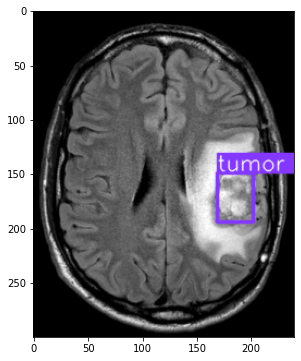

In [10]:
img = 'test/yes/Y20.jpg'
result = cus_model(img)
%matplotlib inline 
plt.figure(figsize=(8,6))
plt.imshow(np.squeeze(result.render()))
plt.show()